# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [5]:
# YOUR CODE HERE
bodyfat= pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/560_bodyfat/560_bodyfat.tsv.gz", sep="\t")
bodyfat = bodyfat.iloc[:, :10]
bodyfat = bodyfat.dropna()
sample= bodyfat.sample(n=10)
sample

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee
230,1.0745,57.0,147.75,65.75,35.200001,99.599998,86.400002,90.099998,53.000000,35.000000
137,1.0325,43.0,187.75,74.00,37.700001,97.800003,98.599998,100.599998,63.599998,39.200001
126,1.0373,42.0,177.50,68.75,38.900002,98.699997,92.099998,98.500000,60.700001,36.799999
74,1.0720,61.0,143.00,65.75,36.500000,93.400002,83.300003,93.000000,55.500000,35.200001
235,1.0563,62.0,168.75,67.50,38.299999,104.699997,95.599998,93.699997,54.400002,37.099998
94,1.0785,47.0,184.25,74.50,37.299999,99.599998,88.800003,101.400002,57.400002,39.599998
28,1.0910,27.0,133.25,64.75,36.400002,93.500000,73.900002,88.500000,50.099998,34.500000
22,1.0631,31.0,140.25,68.25,33.900002,86.000000,76.400002,94.599998,57.400002,35.299999
163,1.0644,34.0,140.00,70.50,36.000000,89.199997,83.400002,89.599998,52.400002,35.599998
107,1.0569,52.0,203.25,74.25,42.000000,110.000000,101.599998,100.699997,55.799999,38.700001


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [5]:
# YOUR CODE HERE
columns = list(bodyfat.columns)
columns
##Density is the numerical relationship between a person's mass and a person's volume. This is done by splitting the entire mass of person into
#two categories, lean body tissue and fat tissue. The overall density will change because lean body tissue weighs more than fat tissue per unit
#(any volume metric). Overall, what density tells us is the higher density, the lower percentage of bodyfat a person will have 

##Age is simply how old the person is in years.

##Weight is how much the person weighs in pounds.

##Height is the person's height in inches. 

##The next seven columns are fairly similar, just for different body parts

##Neck is the circumference around the neck in centimeters 

##Chest is the circumference around the chest in centimeters

##Abodomen is the circumference around the abdomen in centimeters

##Hip is the circumference around the hip in centimeters

##Thigh is the circumference around the thigh in centimeters

##Ankle is the circumference around the ankle in centimeters.


['Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee']

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

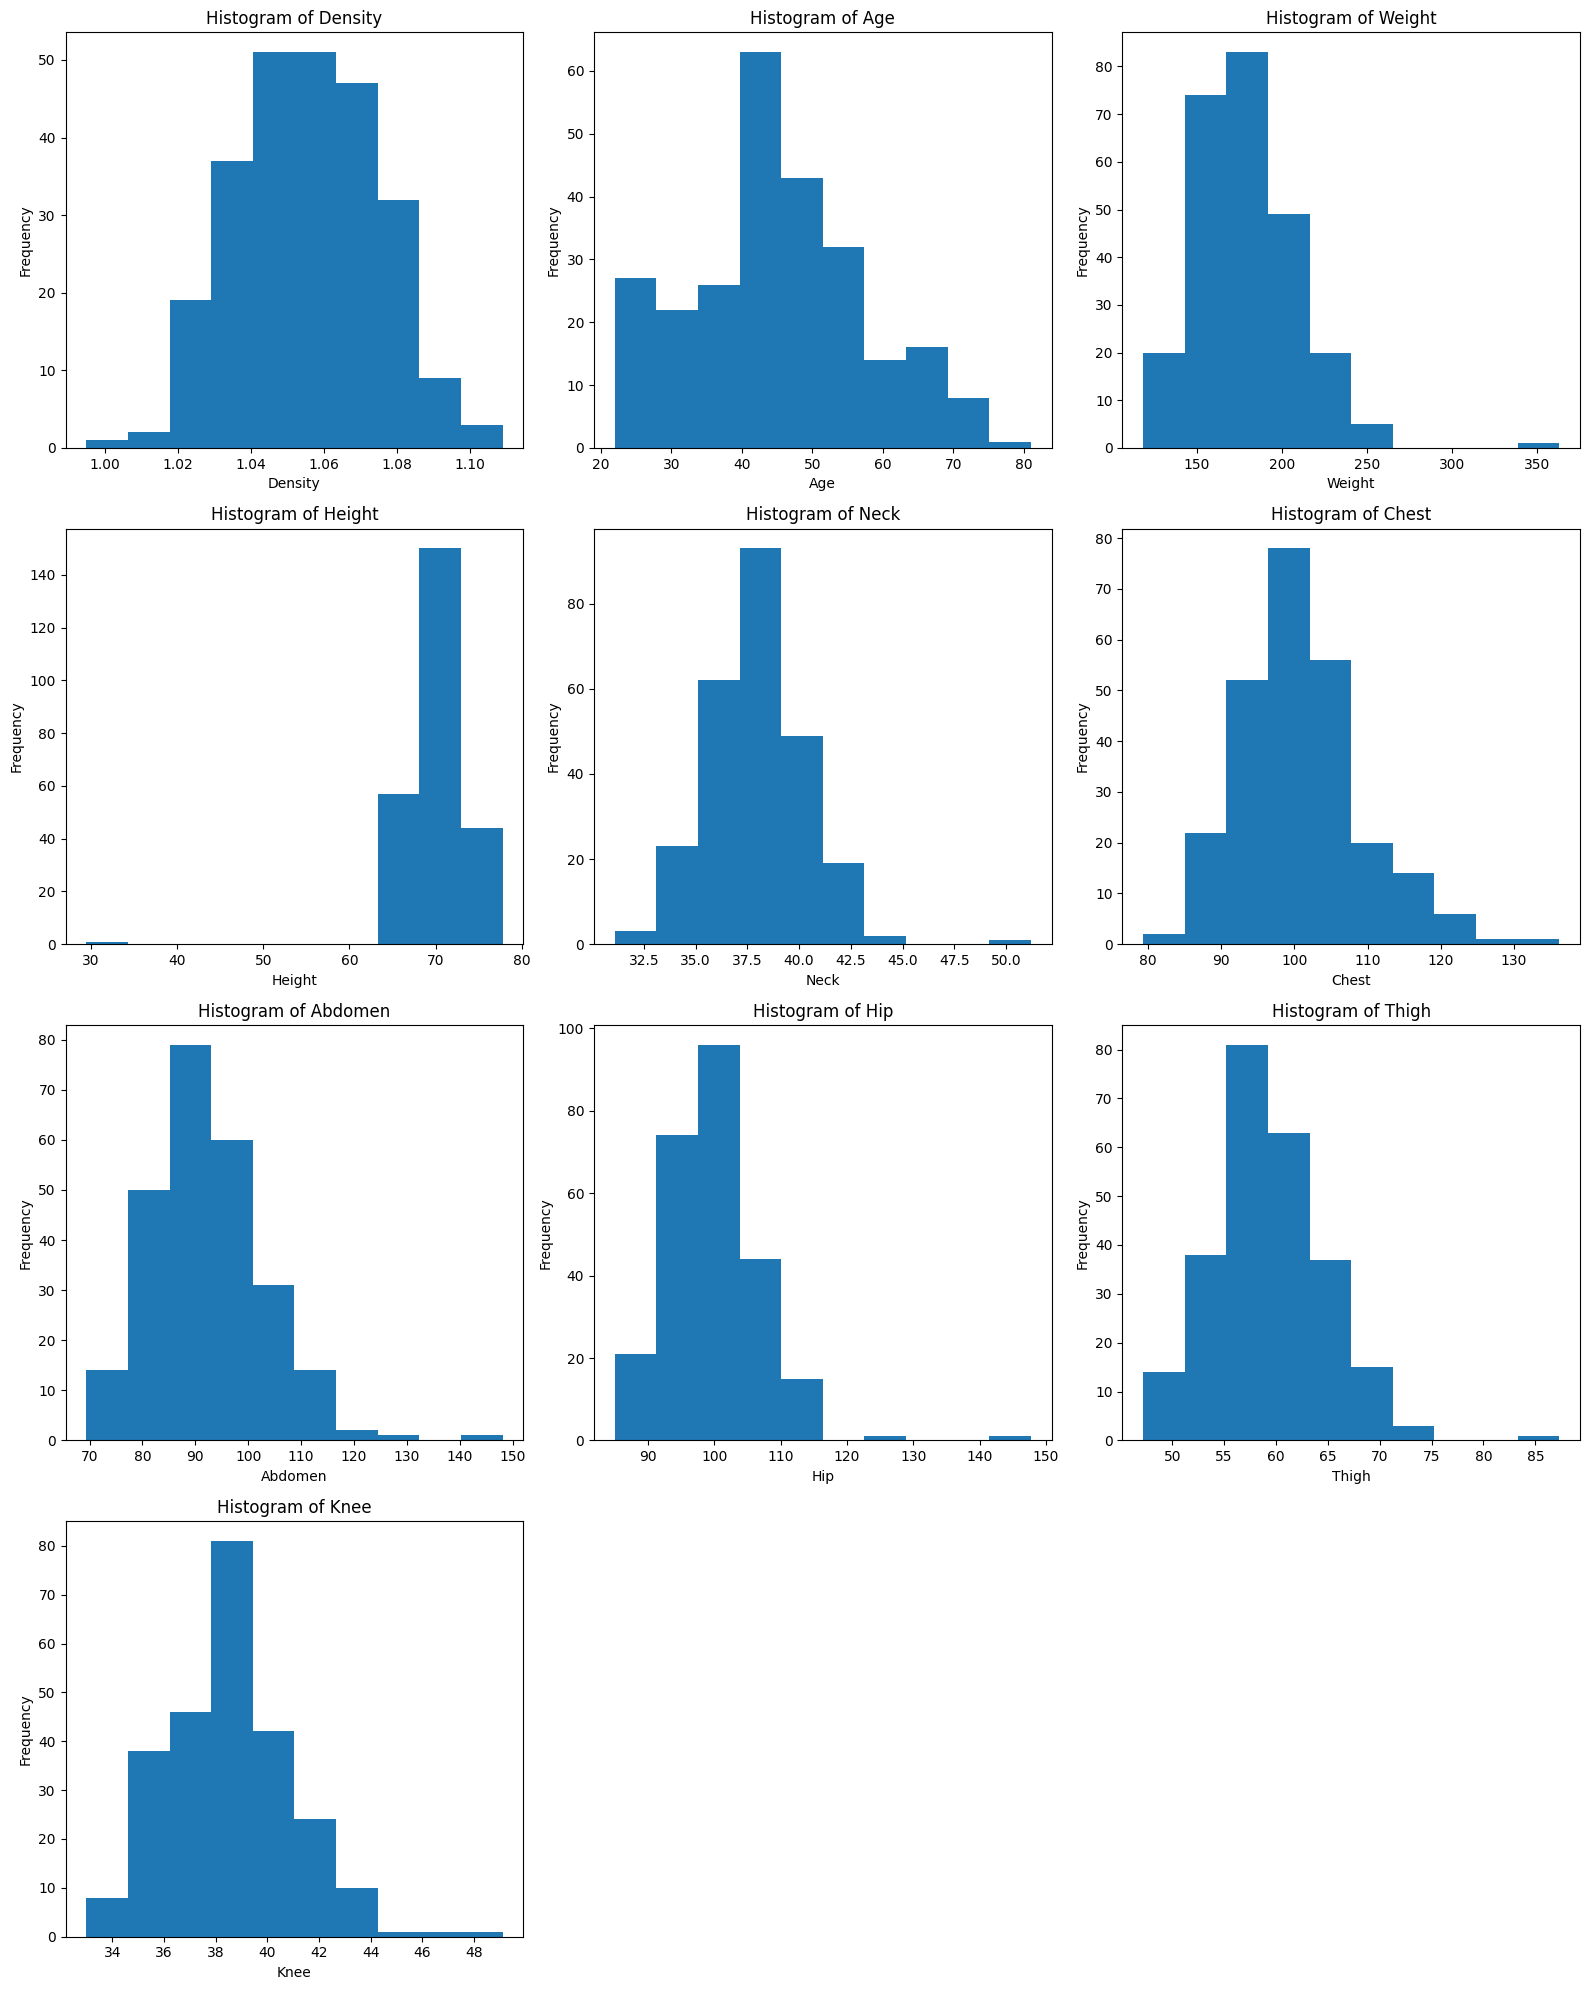

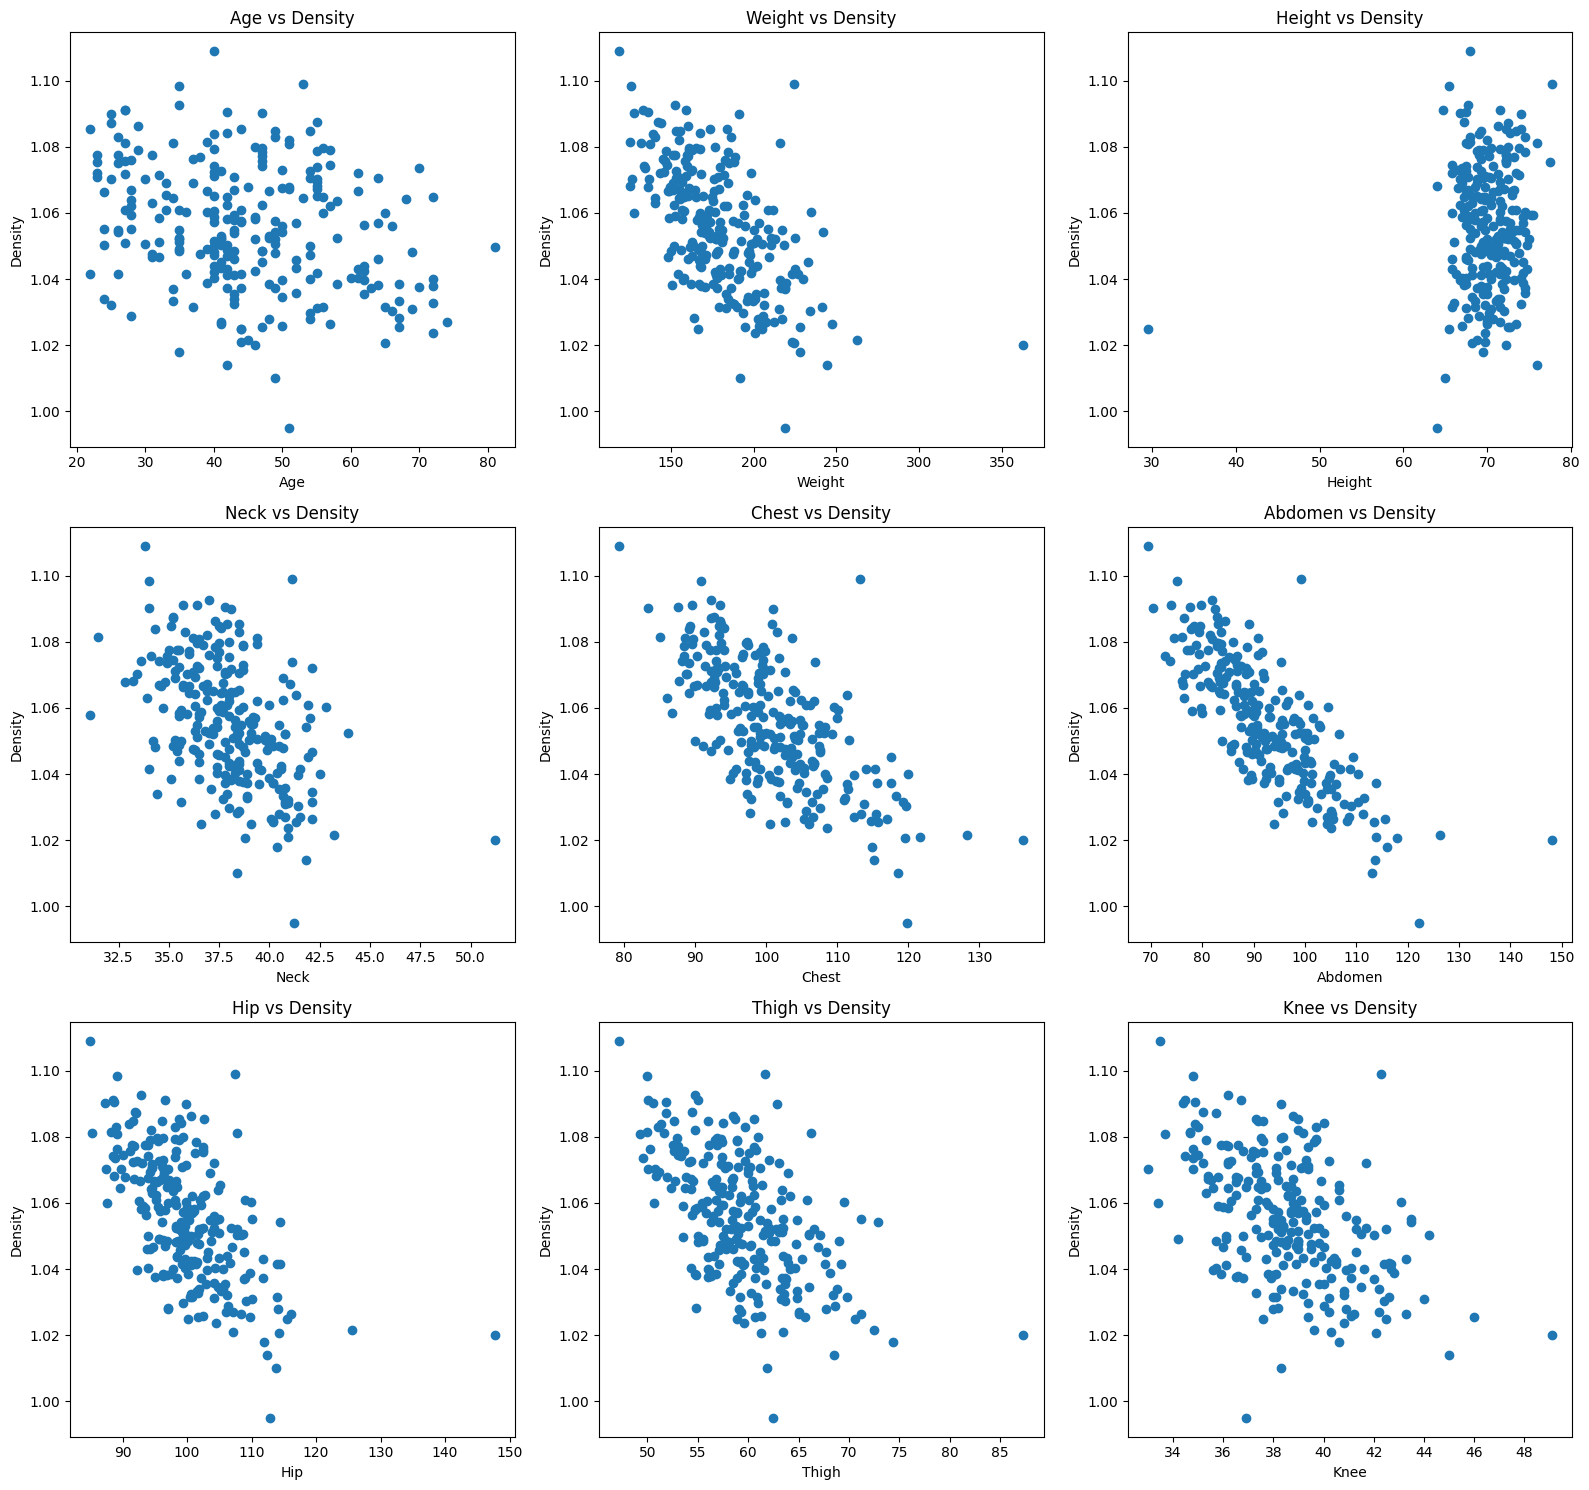

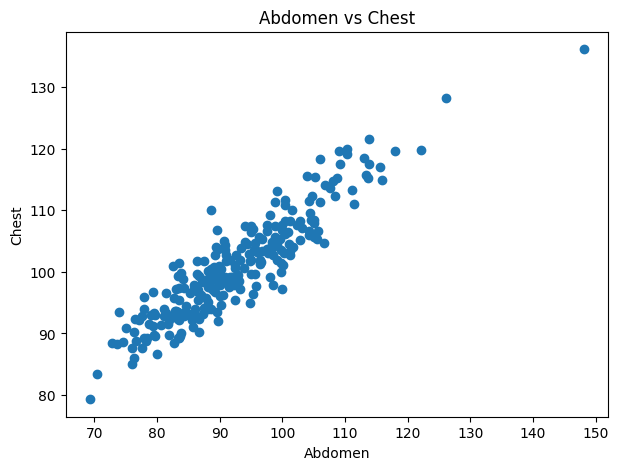

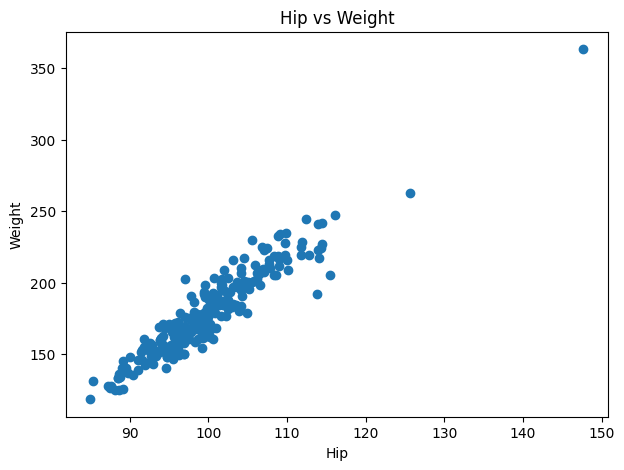

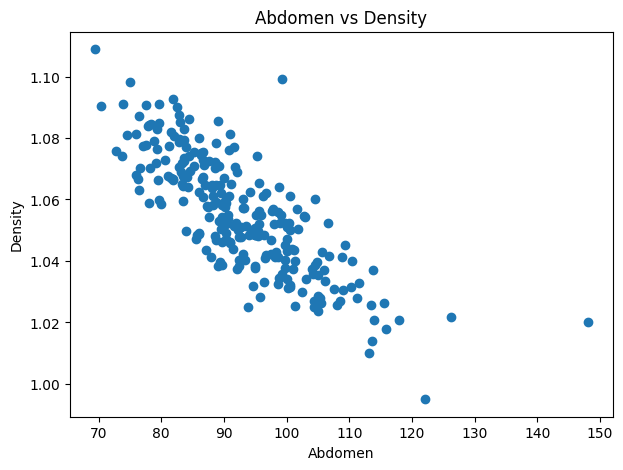

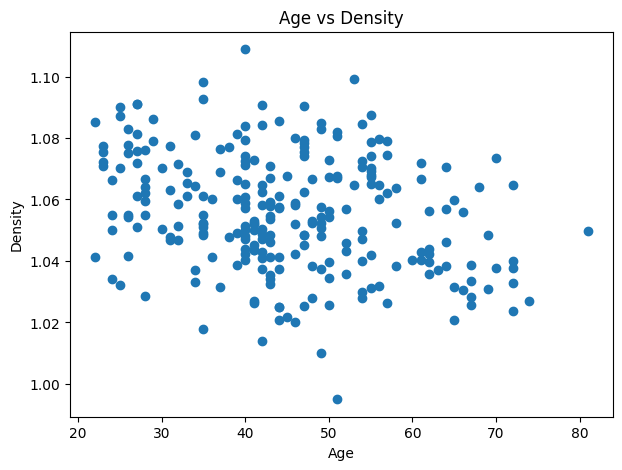

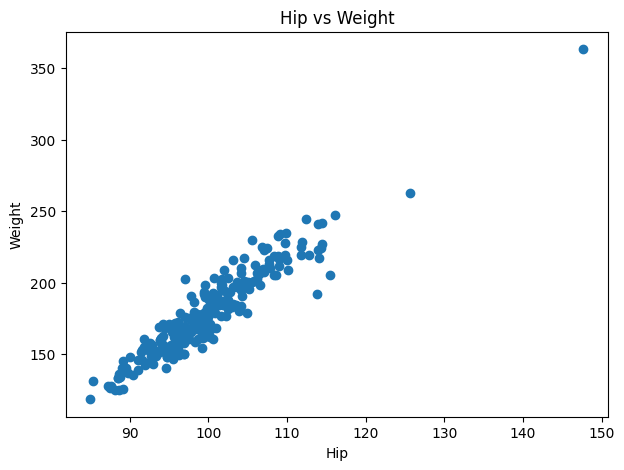

In [6]:
# YOUR CODE HERE
##These are histograms displaying the frequency of values in a given column
cols = bodyfat.columns
n = len(cols)

plots_per_row = 3
rows = math.ceil(n / plots_per_row)

plt.figure(figsize=(16, 5 * rows))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, plots_per_row, i)
    plt.hist(bodyfat[col])
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

##These are scatterplots comparing each feature to Density

features = [col for col in bodyfat.columns if col != "Density"]

m = len(features)
cols = 3                          
rows = math.ceil(m / cols)

plt.figure(figsize=(16, 5 * rows))   

for i, col in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    plt.scatter(bodyfat[col], bodyfat["Density"])
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.title(f"{col} vs Density")

plt.tight_layout()
plt.show()

##These are scatterplots that we are told have a high correlation
plt.figure(figsize=(7, 5))
plt.scatter(bodyfat["Abdomen"], bodyfat["Chest"])
plt.xlabel("Abdomen")
plt.ylabel("Chest")
plt.title("Abdomen vs Chest")
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(bodyfat["Hip"], bodyfat["Weight"])
plt.xlabel("Hip")
plt.ylabel("Weight")
plt.title("Hip vs Weight")
plt.show()

##Three Individual charts that I found Interesting

#I wanted to compare all the features to density because I think it allows for a lot of theory work. Abdomen vs Density seems to be the strongest
#correlated to density compared to the other features. When applying this to real life, the inverse nature of this relationship makes sense. 
#Higher density means a lower bodyfat percentage, and the abdomen section is a notorious place for fat to be stored and hard to get rid of. 
plt.figure(figsize=(7, 5))
plt.scatter(bodyfat["Abdomen"], bodyfat["Density"])
plt.xlabel("Abdomen")
plt.ylabel("Density")
plt.title("Abdomen vs Density")
plt.show()

#On the other hand, the visual of this chart very obviously shows that there is almost no correlation between age and density. 
#In the grand scheme of things, no correlation can be just as interesting as a tight correlation, which is why I chose this graph.
#We can see this in real life as we see many different ages have different body types, causing a low correlation between the two.
plt.figure(figsize=(7, 5))
plt.scatter(bodyfat["Age"], bodyfat["Density"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age vs Density")
plt.show()

#The website we pulled the data from tell us that this is one of the stronger relationships, as hip circumference goes up, weight goes up. While this
#may seem like an obvious connection to make, what we learn is that this relationship is linear, there is an equation in the form of y=mx+b roughly
#explaining this relationship. Interestingly, the linear relationship seems to hold for something that may seem like an "outlier" number. We see from
#the weight histogram that there is one outlier at 350lbs. Even though this weight is so much higher than the rest of the dataset, 
#the hip circumference is still proportionately similar compared to the rest of the dataset.
plt.figure(figsize=(7, 5))
plt.scatter(bodyfat["Hip"], bodyfat["Weight"])
plt.xlabel("Hip")
plt.ylabel("Weight")
plt.title("Hip vs Weight")
plt.show()



YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

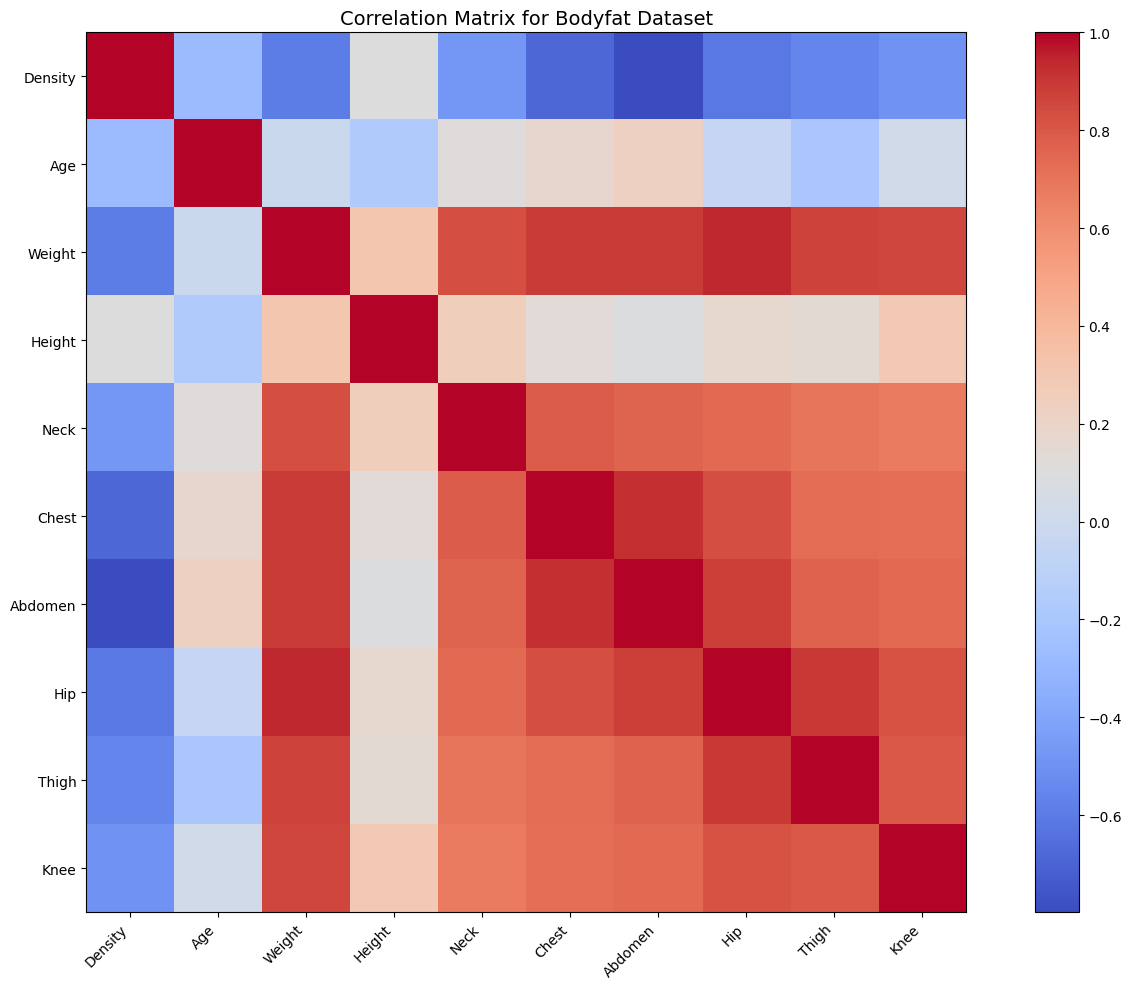

In [ ]:
# YOUR CODE HERE
corr = bodyfat.corr()
plt.figure(figsize=(14, 10)) 
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(
    range(len(corr.columns)),
    corr.columns,
    rotation=45,
    ha="right",
    fontsize=10
)
plt.yticks(
    range(len(corr.columns)),
    corr.columns,
    fontsize=10
)

plt.title("Correlation Matrix for Bodyfat Dataset", fontsize=14)
plt.tight_layout()
plt.show()

#As the dataset website told us before, Weight and Hip have a strong correlation. From the looks of the correlation matrix, weight and hip 
#have the strongest correlation, moreso than the chest and abdomen that the dataset website also mentioned. 

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE

# MODEL 1: LinearRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#https://www.geeksforgeeks.org/machine-learning/ml-linear-regression/

#MODEL 2: Ridge
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
#https://www.ibm.com/think/topics/ridge-regression

#Model 3: SGDRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
#https://www.geeksforgeeks.org/python/stochastic-gradient-descent-regressor/

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

LinearRegression L1: 0.008069411364571928   L2: 0.000101168401864141


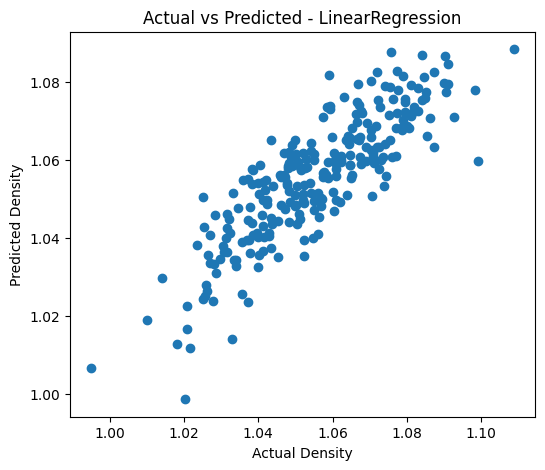

Ridge- L1: 0.008069304092482124   L2: 0.0001011684362998351


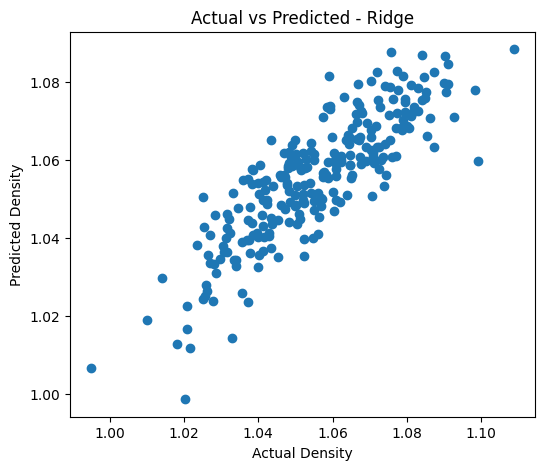

SGDRegressor-L1: 40266054010155.3   L2: 1.6936352741606237e+27


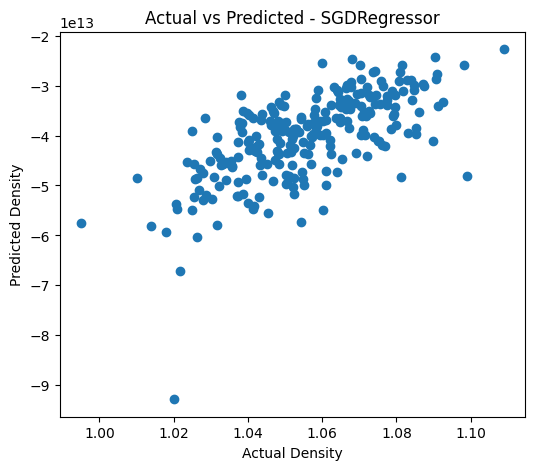

In [32]:
 # YOUR CODE HERE
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

target = "Density"
features = ['Age','Weight','Height','Neck','Chest','Abdomen','Hip','Thigh','Knee']
X = bodyfat[features].values
y = bodyfat[target].values

# L1 and L2 functions
def L1(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def L2(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

#LinearRegression Model
lin = LinearRegression()
lin.fit(X, y)
pred_lin = lin.predict(X)
print("LinearRegression L1:", L1(y, pred_lin), "  L2:", L2(y, pred_lin))
plt.figure(figsize=(6,5))
plt.scatter(y, pred_lin)
plt.xlabel("Actual Density")
plt.ylabel("Predicted Density")
plt.title("Actual vs Predicted - LinearRegression")

plt.show()

#Ridge Model
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
pred_ridge = ridge.predict(X)
print("Ridge- L1:", L1(y, pred_ridge), "  L2:", L2(y, pred_ridge))
plt.figure(figsize=(6,5))
plt.scatter(y, pred_ridge)
plt.xlabel("Actual Density")
plt.ylabel("Predicted Density")
plt.title("Actual vs Predicted - Ridge")
plt.show()

#SGDRegressor Model
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X, y)
pred_sgd = sgd.predict(X)
print("SGDRegressor-L1:", L1(y, pred_sgd), "  L2:", L2(y, pred_sgd))
plt.figure(figsize=(6,5))
plt.scatter(y, pred_sgd)
plt.xlabel("Actual Density")
plt.ylabel("Predicted Density")
plt.title("Actual vs Predicted - SGDRegressor")
plt.show()






YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE